In [6]:
# 2_data_validation.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Load the dataset
df = pd.read_csv("supply_chain_dataset.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

In [8]:

# 1️⃣ Null Value Check
print("🔍 Null Values:")
display(df.isnull().sum())

🔍 Null Values:


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [9]:

# 2️⃣ Data Types Check
print("📂 Data Types:")
display(df.dtypes)

📂 Data Types:


Product type                object
SKU                         object
Price                      float64
Availability                object
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [10]:

# 3️⃣ Basic Stats for Numeric Columns
print("📊 Numeric Summary:")
display(df.describe())

📊 Numeric Summary:


,Price,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000
mean,273.965644,10.017808,2752.079016,100.465205,8.092329,50.158356,5.037260,27.497863,7.898904,524.965205,12.036712,161.111937,0.049863,551.593679
std,131.578196,3.140792,1647.021813,57.140416,3.719837,28.616737,2.564965,13.047181,3.731672,275.489276,4.313842,80.673285,0.028676,258.530577
min,50.060000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,5.030000,2.000000,50.000000,5.000000,20.030000,0.000000,100.010000
25%,158.965000,8.000000,1415.580000,51.000000,5.000000,26.000000,3.000000,16.042500,5.000000,286.000000,8.000000,89.822500,0.025000,329.772500
50%,275.365000,10.000000,2486.490000,102.000000,8.000000,51.000000,5.000000,27.635000,8.000000,526.000000,12.000000,162.800000,0.050250,547.175000
75%,386.732500,12.000000,3827.782500,150.000000,11.000000,75.000000,7.000000,38.670000,11.000000,761.750000,16.000000,231.430000,0.074500,773.700000
max,499.840000,22.000000,10482.990000,199.000000,14.000000,99.000000,9.000000,49.950000,14.000000,999.000000,19.000000,299.930000,0.100000,999.800000


In [11]:

# 4️⃣ Outlier Detection (using IQR) for select features
numeric_cols = [
    'Price', 'Number of products sold', 'Revenue generated',
    'Stock levels', 'Lead times', 'Order quantities',
    'Shipping costs', 'Production volumes', 'Manufacturing costs',
    'Defect rates', 'Costs'
]

In [12]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"⚠️ {col} - Outliers found: {outliers.shape[0]}")

⚠️ Price - Outliers found: 0
⚠️ Number of products sold - Outliers found: 29
⚠️ Revenue generated - Outliers found: 29
⚠️ Stock levels - Outliers found: 0
⚠️ Lead times - Outliers found: 0
⚠️ Order quantities - Outliers found: 0
⚠️ Shipping costs - Outliers found: 0
⚠️ Production volumes - Outliers found: 0
⚠️ Manufacturing costs - Outliers found: 0
⚠️ Defect rates - Outliers found: 0
⚠️ Costs - Outliers found: 0


In [13]:

# 5️⃣ Time Series Missing Date Check per SKU
sku_check = df.groupby('SKU').resample('D').asfreq()
missing = sku_check[sku_check['Number of products sold'].isna()]
print(f"⏳ Total missing sales records by date: {missing.shape[0]}")

⏳ Total missing sales records by date: 0


In [14]:

# 6️⃣ Category Balance
categorical_cols = ['Product type', 'Availability', 'Shipping carriers', 'Supplier name', 'Location', 'Transportation modes', 'Routes']
for cat in categorical_cols:
    print(f"📦 Category distribution: {cat}")
    display(df[cat].value_counts())

📦 Category distribution: Product type


Product type
Furniture      1252
Electronics    1204
Clothing       1194
Name: count, dtype: int64

📦 Category distribution: Availability


Availability
In Stock        1835
Out of Stock    1815
Name: count, dtype: int64

📦 Category distribution: Shipping carriers


Shipping carriers
Carrier X    1230
Carrier Y    1220
Carrier Z    1200
Name: count, dtype: int64

📦 Category distribution: Supplier name


Supplier name
Supplier A    1266
Supplier B    1216
Supplier C    1168
Name: count, dtype: int64

📦 Category distribution: Location


Location
South    936
West     934
East     917
North    863
Name: count, dtype: int64

📦 Category distribution: Transportation modes


Transportation modes
Air     1219
Sea     1217
Road    1214
Name: count, dtype: int64

📦 Category distribution: Routes


Routes
Route 1    1267
Route 3    1207
Route 2    1176
Name: count, dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


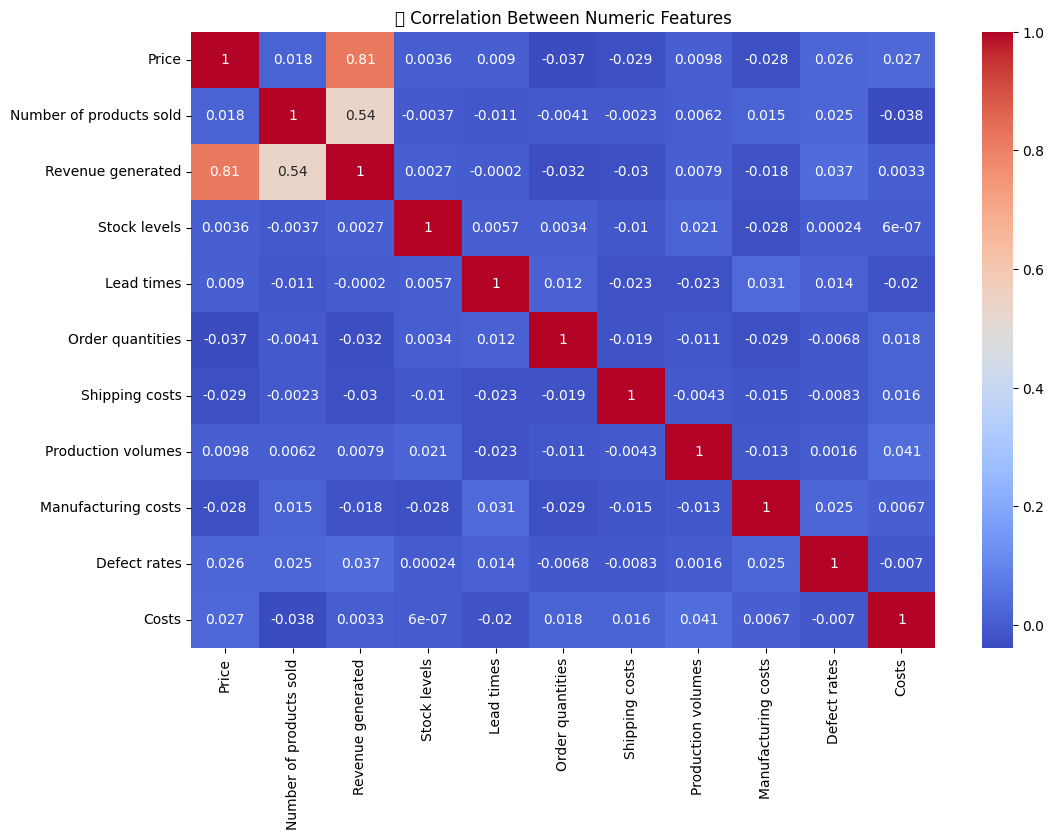

In [15]:

# 7️⃣ Correlation Heatmap (Optional)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Between Numeric Features")
plt.show()
